In [44]:
import pandas as pd
import json
import math
import datetime
import matplotlib.pyplot as plt
from os import listdir
dir_chats = "whatsapp chats/"
chats = listdir(dir_chats)

In [45]:
def parse_chat(chat_path):
    filename = chat_path
    df = pd.read_csv(filename, header=None, error_bad_lines=False,
                     encoding='utf8')
    df = df.drop(0)
    df.columns = ['Date', 'Chat']
    Message = df['Chat'].str.split('-', n=1, expand=True)
    df['Date'] = df['Date'].str.replace(',', '')
    df['Time'] = Message[0]
    df['content'] = Message[1]
    Message1 = df['content'].str.split(':', n=1, expand=True)
    df['content'] = Message1[1]
    df['sender_name'] = Message1[0]
    df = df.drop(columns=['Chat'])
    df['content'] = df['content'].str.lower()
    df['content'] = df['content'].str.replace('<media omitted>', 'MediaShared')
    df['content'] = df['content'].str.replace('this message was deleted',
                                        'DeletedMsg')
    df.dropna(inplace=True)
    df["date_time"] = pd.to_datetime(df.Date + df.Time) 
    df = df.reindex(columns=['date_time', 'sender_name', 'content'])
    df["delta_mensajes_minutos"] = df.date_time.diff()[:].astype('timedelta64[m]')
    df["delta_mensajes_horas"] = df.date_time.diff()[:].astype('timedelta64[h]')
    df = df.set_index("date_time")
    return df

In [46]:
chat_dfs = []
for conversation in chats:
    sender_name = conversation[21:]
    conv = parse_chat(dir_chats + conversation)
    chat_dfs.append(conv)

b'Skipping line 7: expected 2 fields, saw 4\nSkipping line 11: expected 2 fields, saw 3\nSkipping line 12: expected 2 fields, saw 3\n'
b'Skipping line 5: expected 2 fields, saw 3\nSkipping line 61: expected 2 fields, saw 3\nSkipping line 66: expected 2 fields, saw 3\nSkipping line 70: expected 2 fields, saw 3\n'
b'Skipping line 5: expected 2 fields, saw 3\nSkipping line 8: expected 2 fields, saw 3\nSkipping line 13: expected 2 fields, saw 3\nSkipping line 14: expected 2 fields, saw 3\nSkipping line 19: expected 2 fields, saw 3\nSkipping line 21: expected 2 fields, saw 3\nSkipping line 28: expected 2 fields, saw 5\nSkipping line 40: expected 2 fields, saw 3\nSkipping line 50: expected 2 fields, saw 4\nSkipping line 57: expected 2 fields, saw 3\nSkipping line 59: expected 2 fields, saw 3\n'
b'Skipping line 9: expected 2 fields, saw 3\nSkipping line 15: expected 2 fields, saw 3\nSkipping line 20: expected 2 fields, saw 3\nSkipping line 53: expected 2 fields, saw 3\nSkipping line 57: expec

In [107]:
all_chats = pd.concat(chat_dfs)
name_filter = all_chats["sender_name"].str.strip()!='A n e m o n e'
client_messages = all_chats[name_filter]

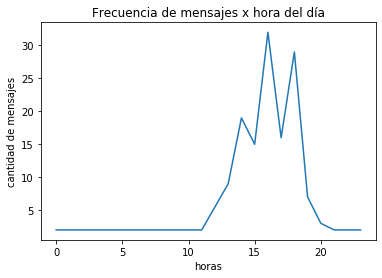

In [108]:
y = client_messages.sender_name.groupby(client_messages.index.hour).count()
fig = plt.figure()
ax = plt.axes()
plt.title("Frecuencia de mensajes x hora del día")
plt.xlabel("horas")
plt.ylabel("cantidad de mensajes")
ax.plot(y.index, y)

# Horarios con más chats

In [109]:
horarios = y.sort_values(ascending=False)[:3].index

In [133]:
mensaje_horarios = f"Sus horarios en donde recibe más mensajes son a las {horarios[0]}hrs, las {horarios[1]}hrs y las {horarios[2]}hrs."

In [134]:
print(mensaje_horarios)

Sus horarios en donde recibe más mensajes son a las 16hrs, las 18hrs y las 14hrs.


# ¿Quienes son los clientes más activos?

In [135]:
client_most_messages = client_messages.groupby(client_messages.sender_name).count().sort_values("content", ascending=False)[:3].index

In [140]:
most_active_client_message = f"Sus top tres clientes más activos son 1.{client_most_messages[0]}, 2.{client_most_messages[1]}, y 3.{client_most_messages[2]}"

In [142]:
print(most_active_client_message)

Sus top tres clientes más activos son 1. Patricio Coatza, 2. +52 1 921 151 9490, y 3. Amigo caro
